In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)
from sklearn.linear_model import LogisticRegression
from   sklearn.model_selection import train_test_split, cross_val_score
import swifter
%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 8.0)
plt.style.use('seaborn-poster')

## Datasets for analysis
* imdb: dataset of tv shows shown on television and possibly netflix & amazon prime
* netflix: dataset of shows on netflix
* prime: dataset of shows on amazon prime
* netflixToo: dataset of shows that are on both netflix and regular TV
* primeToo: dataset of shows that are on both amazon prime and regular TV

In [2]:
imdb = pd.read_csv("non_netflix_shows.csv")
netflix = pd.read_csv("netflixCleaned.csv")
prime = pd.read_csv("primeCleaned.csv")
netflixToo =pd.read_csv("onNetToo.csv")
primeToo =pd.read_csv("onPrimeToo.csv")

## Basic stats

In [3]:
imdb.describe()

,rating,numVotes,isAdult,startYear
count,71532.000000,7.153200e+04,71532.000000,71532.000000
mean,6.783718,1.287196e+03,0.005033,2004.887225
std,1.499946,1.692162e+04,0.070763,14.730930
min,1.000000,5.000000e+00,0.000000,1906.000000
25%,6.000000,1.200000e+01,0.000000,2000.000000
50%,7.100000,2.800000e+01,0.000000,2010.000000
75%,7.900000,1.100000e+02,0.000000,2015.000000
max,10.000000,1.877117e+06,1.000000,2021.000000


In [4]:
netflix.describe()

,startYear,rating,numVotes
count,605.000000,605.000000,605.0
mean,2010.325620,8.409421,80.0
std,9.372431,1.234437,0.0
min,1940.000000,5.500000,80.0
25%,2007.000000,7.500000,80.0
50%,2015.000000,8.800000,80.0
75%,2016.000000,9.500000,80.0
max,2017.000000,9.900000,80.0


In [5]:
prime.describe()

,S.no.,startYear,No of seasons available,rating
count,404.000000,393.000000,393.000000,182.000000
mean,202.500000,2011.279898,2.608142,7.354396
std,116.769003,12.944861,2.592008,0.959372
min,1.000000,1926.000000,1.000000,3.700000
25%,101.750000,2011.000000,1.000000,6.900000
50%,202.500000,2016.000000,2.000000,7.500000
75%,303.250000,2018.000000,3.000000,8.100000
max,404.000000,2020.000000,20.000000,9.000000


In [6]:
netflixToo.describe()

,rating,numVotes_x,isAdult,startYear,startYear_y,rating_y,numVotes_y
count,441.000000,4.410000e+02,441.0,441.000000,441.000000,441.000000,441.0
mean,7.506803,1.248665e+05,0.0,2006.687075,2011.952381,8.587302,80.0
std,0.967682,2.205942e+05,0.0,11.804354,8.493580,1.195873,0.0
min,4.200000,7.000000e+00,0.0,1954.000000,1940.000000,5.500000,80.0
25%,7.100000,1.573000e+03,0.0,2005.000000,2012.000000,7.900000,80.0
50%,7.700000,2.571300e+04,0.0,2010.000000,2015.000000,9.100000,80.0
75%,8.100000,1.574520e+05,0.0,2014.000000,2016.000000,9.500000,80.0
max,9.700000,1.584010e+06,0.0,2021.000000,2017.000000,9.900000,80.0


In [7]:
primeToo.describe()

,rating,numVotes,isAdult,startYear,S.no.,startYear_y,No of seasons available,rating_y
count,309.000000,309.000000,309.0,309.000000,309.000000,309.000000,309.000000,144.000000
mean,7.233010,38123.197411,0.0,2008.540453,170.411003,2010.537217,3.220065,7.499306
std,1.165777,88358.425132,0.0,13.640413,107.892545,11.595569,2.812908,0.816396
min,2.200000,5.000000,0.0,1955.000000,2.000000,1956.000000,1.000000,4.000000
25%,6.800000,390.000000,0.0,2005.000000,78.000000,2008.000000,1.000000,7.100000
50%,7.400000,5522.000000,0.0,2014.000000,156.000000,2015.000000,2.000000,7.500000
75%,8.000000,34339.000000,0.0,2017.000000,261.000000,2018.000000,4.000000,8.200000
max,9.600000,751246.000000,0.0,2021.000000,390.000000,2020.000000,20.000000,9.000000


## Correlations
We will check for pearson and spearman

In [8]:
imdb.corr(method ='pearson')

,rating,numVotes,isAdult,startYear
rating,1.000000,0.057351,-0.019406,-0.047511
numVotes,0.057351,1.000000,-0.005325,0.018405
isAdult,-0.019406,-0.005325,1.000000,0.024470
startYear,-0.047511,0.018405,0.024470,1.000000


In [9]:
imdb.corr(method ='spearman')

,rating,numVotes,isAdult,startYear
rating,1.000000,0.062200,-0.030304,0.018449
numVotes,0.062200,1.000000,-0.055994,0.011601
isAdult,-0.030304,-0.055994,1.000000,0.012707
startYear,0.018449,0.011601,0.012707,1.000000


no strong correlations found in imdb data

In [10]:
netflix.corr(method ='pearson')

,startYear,rating,numVotes
startYear,1.000000,0.270109,NaN
rating,0.270109,1.000000,NaN
numVotes,NaN,NaN,NaN


In [11]:
netflix.corr(method ='spearman')

,startYear,rating,numVotes
startYear,1.000000,0.297006,NaN
rating,0.297006,1.000000,NaN
numVotes,NaN,NaN,NaN


## Observation## 
There is a moderate correlation between tv start year and rating but this is very minimal and could be cause due to data size and the age distribution of movies on netflix (more recent than older movies)

In [12]:
prime.corr(method ='pearson')

,S.no.,startYear,No of seasons available,rating
S.no.,1.000000,-0.143054,-0.198183,-0.466985
startYear,-0.143054,1.000000,-0.211353,-0.108622
No of seasons available,-0.198183,-0.211353,1.000000,0.292592
rating,-0.466985,-0.108622,0.292592,1.000000


In [13]:
prime.corr(method ='spearman')

,S.no.,startYear,No of seasons available,rating
S.no.,1.000000,-0.050402,-0.238552,-0.513424
startYear,-0.050402,1.000000,-0.487112,-0.251401
No of seasons available,-0.238552,-0.487112,1.000000,0.352171
rating,-0.513424,-0.251401,0.352171,1.000000


## Observation## 
There is a correlation between # of season and startYear. Suggests that older tv shows ran for more seasons compared to newer ones. Could also be the fact that streaming services do not have many older tv shows so the ones that they get are because they that popular/legendary so they more likely to have multiple seasons

In [14]:
primeToo.corr(method ='pearson')

,rating,numVotes,isAdult,startYear,S.no.,startYear_y,No of seasons available,rating_y
rating,1.000000,0.319781,NaN,0.019394,-0.270032,0.007475,0.199262,0.741134
numVotes,0.319781,1.000000,NaN,0.020405,-0.178457,-0.033385,0.499969,0.426843
isAdult,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
startYear,0.019394,0.020405,NaN,1.000000,-0.237120,0.773717,-0.251127,0.050624
S.no.,-0.270032,-0.178457,NaN,-0.237120,1.000000,-0.287906,-0.060882,-0.397243
startYear_y,0.007475,-0.033385,NaN,0.773717,-0.287906,1.000000,-0.293599,0.016713
No of seasons available,0.199262,0.499969,NaN,-0.251127,-0.060882,-0.293599,1.000000,0.280828
rating_y,0.741134,0.426843,NaN,0.050624,-0.397243,0.016713,0.280828,1.000000


## Observation## 
There is a correlation between ratings and start year supports previous conclusion that the older shows that are on streaming services are more successful but this is most likely intentional. (streaming services would want to get classics, critically acclaimed shows)

## Comparing rating distribution
We want to see how a show that is on tv and a streaming service compare to the shows only on TV  We are comparing the ratings of show only on tv to those that are also on netflix/prime.

Text(0, 0.5, 'rating')

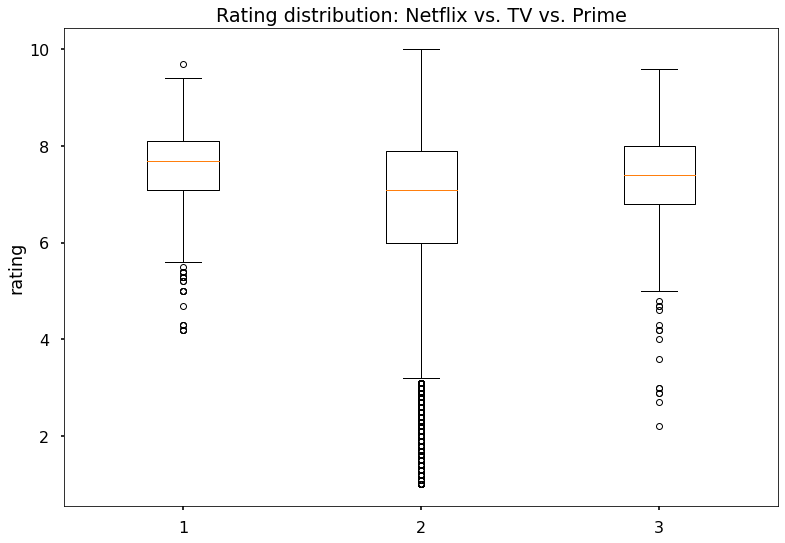

In [15]:
p = {"Netflix": netflixToo['rating'], "All TV (IMDB)":imdb['rating'],"Prime":primeToo['rating']}
plt.boxplot(p.values())
plt.title("Rating distribution: Netflix vs. TV vs. Prime")
plt.ylabel("rating")

## Observations ##
* We see mean rating for shows on tv and on streaming services are higher than the average for shows solely on tv.
* The range of ratings for all tv series is wider than shows that are also on streaming services. This could be the fact that there is more data avalible for the imdb data. 
* Tv series not on streaming services may have a rating as low as 1/0.5 while shows also on netflix may be as low as 4
* Majorty of the shows rate higher on streaming servies compared to tv. 50% of data falls between 8 and 7 while on tv its ranges from about 7.8 to 5.9. Reasons for this could be that the quality of shows on streaming services are better, or people are less picky when watching shows on a streaming service, or since there are less votes in our prime and netflix datasets, this is skewing the results of the streaming services.
* Overall the boxplot supports the idea that having tv series also available on streaming services increases its rating
**note** this is based on the year the tv show started, not when it was released on netflix. We plan to see how the ratings of particular show changed once it is added to netflix and prime later

Text(0.5, 0, 'platforms')

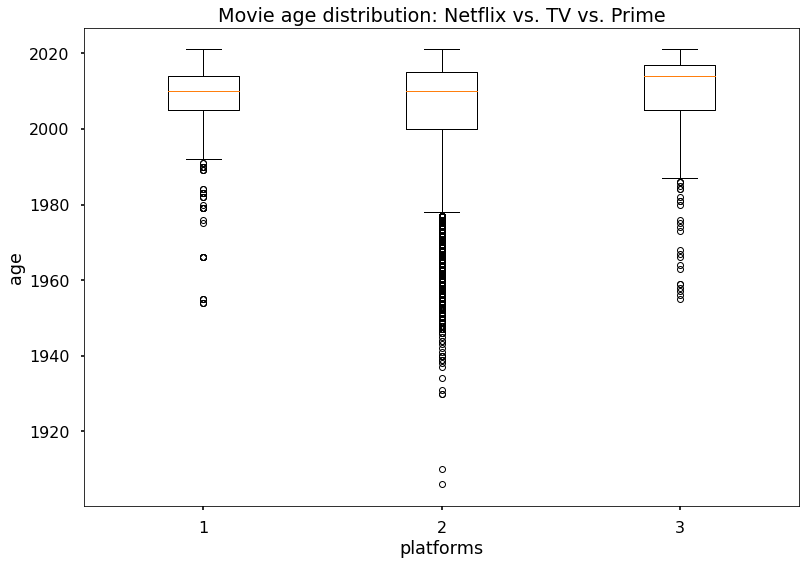

In [16]:
p = {"Netflix": netflixToo['startYear'], "All TV (IMDB)":imdb['startYear'],"Prime":primeToo['startYear']}
plt.boxplot(p.values())
plt.title("Movie age distribution: Netflix vs. TV vs. Prime")
plt.ylabel("age")
plt.xlabel('platforms')

## Observations
This distrubution shows that tv (imdb) show a wider age range of shows. 25% of their shows are between 2000 and 1978 while 25% of netflix shows fall between about 2008 and 1993 and 25% of amazon prime shows all between about 2011 and 1999. This supports an idea that tv has a wider age variety while streaming services gear toward newer cotent. We see a long tail of outliers present on all three platforms meaning all platforms have older tv content. But we also see a lot more outliers in the TV distrubution possibly because its a larger dataset.

## Most abundant genres across platforms

Text(0, 0.5, 'count')

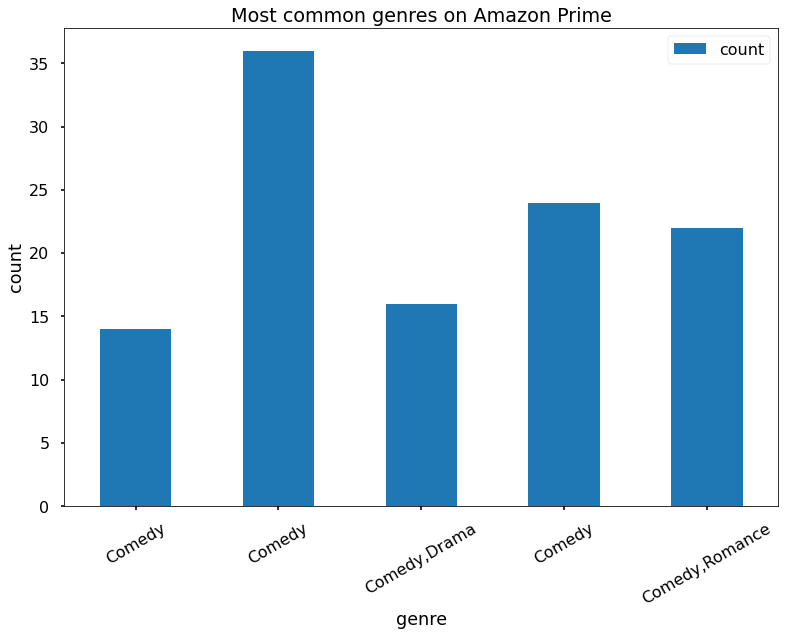

In [17]:
genres = primeToo
genres['count'] = genres.groupby(by = 'genre',as_index = False).count()['title']
genres = genres[genres['count']>10]
genres.plot.bar('genre','count')
plt.xticks(rotation = 30)
plt.title('Most common genres on Amazon Prime')
plt.ylabel('count')

Text(0, 0.5, 'count')

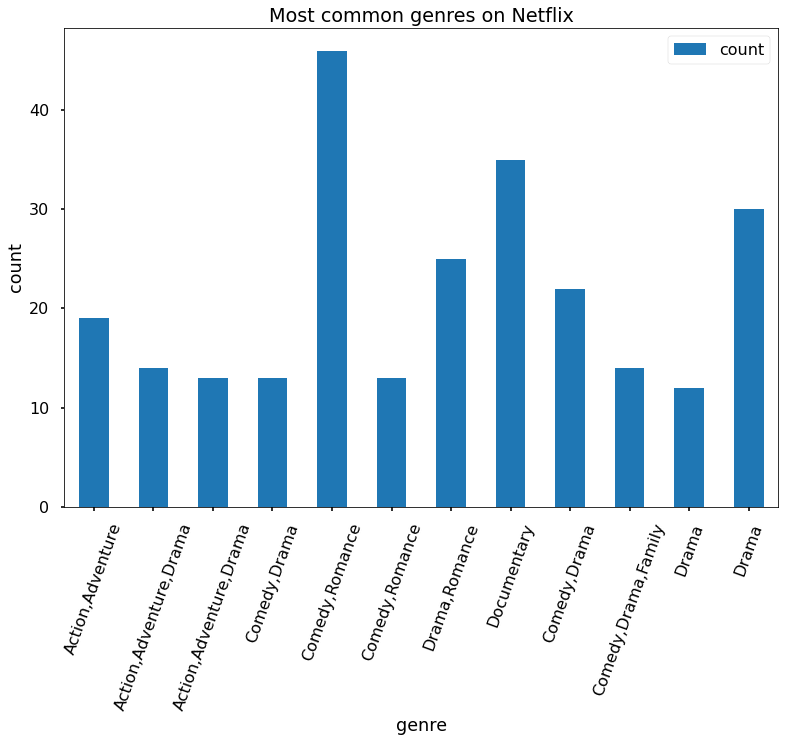

In [18]:
genres = netflixToo
genres['count'] = genres.groupby(by = 'genre',as_index = False).count()['title']
genres = genres[genres['count']>10]
genres.plot.bar('genre','count')
plt.xticks(rotation = 70)
plt.title('Most common genres on Netflix')
plt.ylabel('count')

Text(0, 0.5, 'count')

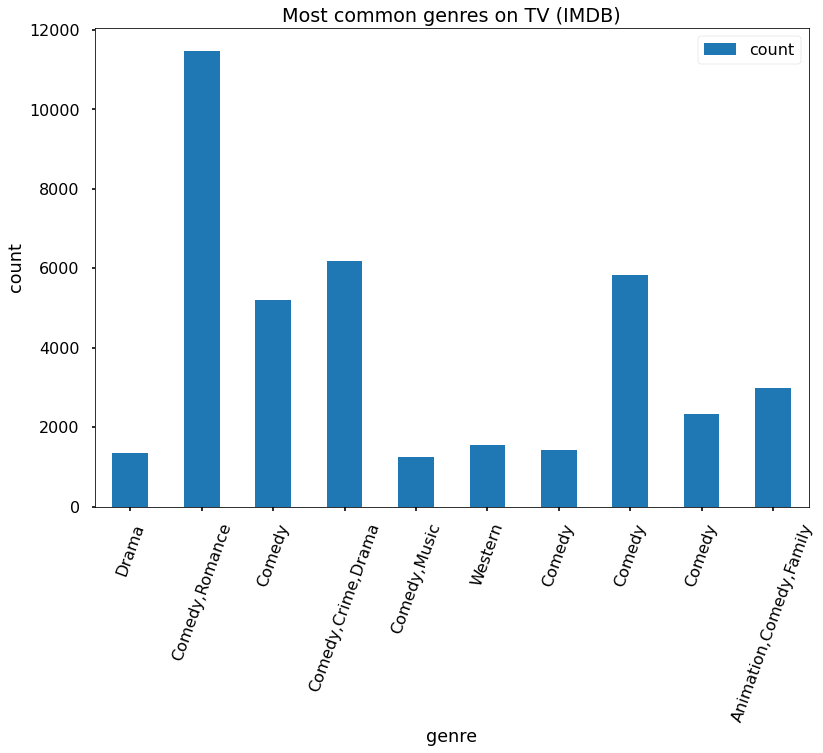

In [19]:
genres = imdb
genres['count'] = genres.groupby(by = 'genre',as_index = False).count()['title']
genres = genres[genres['count']>1200]
genres.plot.bar('genre','count')
plt.xticks(rotation = 70)
plt.title('Most common genres on TV (IMDB)')
plt.ylabel('count')

## Observations
* Drama adventure & comedy are shown the most across all platforms
* General tv(imdb) has more variety possibly because it falls in a wider age range as shown in the age distribution boxplots eariler. The streaming service's genres are more repetitive (ex. dont have westerns)


# Part 1#
## Question 1: What factors impact the success of a movie?##

**variables we are starting with based on the information we have access to from our data sets**
* genre
* source: what is the movie based on (book, remake, spinoff, toy...)
* age rating
* is the movie a sequal
* internation box office
* domestic box office
* budget
* release date



In [20]:
movies = pd.read_csv("MovieData.csv")
movies = movies.rename(columns = {'rating': "age_rating"})

In [21]:
movies = movies.dropna()

In [22]:
movie_ratings = pd.read_csv("movies.csv")
# renaming column name to access more easily
movies = movies.rename(columns = {"movie_name": 'title'})

In [23]:
movies_log_data = movie_ratings.merge(movies,on = 'title', how = 'inner')

In [24]:
movies_log_data = movies_log_data.drop(['runtimeMinutes','title','movie_odid','endYear','production_method','production_year','isAdult','numVotes','originalTitle','genre_x'], axis = 1)




**create dummy variables for non-numeric variables**

In [25]:
movies_genre = pd.get_dummies(movies_log_data['genre_y'])
movies_log_data = pd.concat([movies_log_data,movies_genre],axis = 1)

In [26]:
movies_rat = pd.get_dummies(movies_log_data['age_rating'])
movies_log_data = pd.concat([movies_log_data,movies_rat],axis = 1)

In [27]:
movies_type = pd.get_dummies(movies_log_data['creative_type'])
movies_log_data = pd.concat([movies_log_data,movies_type],axis = 1)

In [28]:
movies_src = pd.get_dummies(movies_log_data['source'])
movies_log_data = pd.concat([movies_log_data,movies_src],axis = 1)

In [29]:
movies_log_data['successful'] = movies_log_data['rating'] >7                              
                                                

In [30]:
movies_log_data = movies_log_data.drop(['running_time','genre_y','rating','age_rating','creative_type','source'], axis = 1)


In [31]:
movies_log_data = movies_log_data[movies_log_data['startYear'] > 1990]

We will adjust the budget and year variables so that they are smaller but still keep the original proprtions. This will prevent the coefficent from getting skewed since the budgets of the movies are extremely higher then our true fault variables

In [32]:
variables = movies_log_data.drop(['successful'], axis = 1)


## Attempt 1 analysis##
Budget, international box office, domestic box office and release date were causing the coefficients for all the variables to fall to zero. These variables are extremely greater than the binary dummy variables so we wanted to check if using these larger values were necessary in order to predict the success of a movie.

In [33]:
movie_rate_model = LogisticRegression().fit(variables, movies_log_data['successful'])
c = movie_rate_model.coef_
v = variables.columns.tolist()
print('coefficients with extremely large factors')
for i in range(0,len(v)):
    print('{}: {:.5f}'.format(v[i], movie_rate_model.coef_[0][i]))
score = movie_rate_model.score(variables, movies_log_data['successful'])
print(f'scikit-learn r^2 score: {score}')

coefficients with extremely large factors
startYear: -0.00000
production_budget: -0.00000
domestic_box_office: 0.00000
international_box_office: 0.00000
sequel: -0.00000
Action: -0.00000
Adventure: -0.00000
Black Comedy: 0.00000
Comedy: -0.00000
Concert/Performance: -0.00000
Documentary: 0.00000
Drama: -0.00000
Horror: -0.00000
Musical: -0.00000
Romantic Comedy: -0.00000
Thriller/Suspense: -0.00000
Western: 0.00000
G: 0.00000
Not Rated: -0.00000
PG: -0.00000
PG-13: -0.00000
R: -0.00000
Contemporary Fiction: -0.00000
Dramatization: 0.00000
Factual: -0.00000
Fantasy: -0.00000
Historical Fiction: -0.00000
Kids Fiction: -0.00000
Multiple Creative Types: 0.00000
Science Fiction: -0.00000
Super Hero: 0.00000
Based on Comic/Graphic Novel: 0.00000
Based on Factual Book/Article: 0.00000
Based on Fiction Book/Short Story: -0.00000
Based on Folk Tale/Legend/Fairytale: -0.00000
Based on Game: -0.00000
Based on Movie: -0.00000
Based on Musical Group: 0.00000
Based on Musical or Opera: -0.00000
Base

In [34]:
scores = cross_val_score(movie_rate_model,variables,movies_log_data['successful'], cv= 5)
print("mean cross validation score: {:.3f}".format(scores.mean()))

mean cross validation score: 0.735


In [35]:
score = movie_rate_model.score(variables, movies_log_data['successful'])
print(f'scikit-learn r^2 score: {score}')

scikit-learn r^2 score: 0.7347126436781609


In [36]:
print('Baseline accuracy:', round(movies_log_data.successful.sum()/len(movies_log_data),3))

Baseline accuracy: 0.244


## Attempt 2## 
Removing the extremely large variables to reduce the skew in our coefficients improved the model. so box office, release data, and budget do not help predict the success of a movie. **This went against our prediction that the more money invested in a film, the more likely it will be successful.**

In [37]:
variables = movies_log_data.drop(['successful','production_budget','domestic_box_office','international_box_office','startYear'], axis = 1)
movie_rate_model = LogisticRegression().fit(variables, movies_log_data['successful'])
scores = cross_val_score(movie_rate_model,variables,movies_log_data['successful'], cv= 5)
print("mean cross validation score: {:.3f}".format(scores.mean()))
score = movie_rate_model.score(variables, movies_log_data['successful'])
print('r^2 score: {:.3f}'.format(score))
c = movie_rate_model.coef_
v = variables.columns.tolist()
print('\n')
print('coefficients')
for i in range(0,len(v)):
    print('{}: {:.5f}'.format(v[i], movie_rate_model.coef_[0][i]))



mean cross validation score: 0.746
r^2 score: 0.760


coefficients
sequel: -0.24135
Action: -0.38323
Adventure: -0.00179
Black Comedy: 0.63937
Comedy: -0.67666
Concert/Performance: -0.14054
Documentary: 0.49156
Drama: 0.53407
Horror: -0.92017
Musical: 0.65797
Romantic Comedy: -0.82416
Thriller/Suspense: 0.05186
Western: 0.56944
G: 0.36029
Not Rated: -0.13362
PG: -0.04392
PG-13: -0.24095
R: 0.05591
Contemporary Fiction: -0.44669
Dramatization: -0.05000
Factual: 0.19919
Fantasy: -0.28530
Historical Fiction: -0.16010
Kids Fiction: -0.03298
Multiple Creative Types: 0.27486
Science Fiction: -0.17662
Super Hero: 0.67536
Based on Comic/Graphic Novel: 0.47920
Based on Factual Book/Article: 0.99540
Based on Fiction Book/Short Story: 0.50030
Based on Folk Tale/Legend/Fairytale: 0.19075
Based on Game: -0.00356
Based on Movie: -0.32458
Based on Musical Group: 0.59987
Based on Musical or Opera: -0.61959
Based on Play: 0.41539
Based on Real Life Events: 0.31952
Based on Religious Text: -1.15763
Base

## Model Analysis##
We see that we are able to predict the success of a movie based on these factors. Our predictions are .51 higher than baseline which indicates that our model is doing a good job. But lets see which factors are most significant and what this means for movies of the future.

In [38]:
genres = movies['genre'].unique()
age_rating = movies['age_rating'].unique()
source = movies['source'].unique()
creative_type = movies['creative_type'].unique()
co = movie_rate_model.coef_[0].tolist()
v = variables.columns.tolist()
movie_co = pd.DataFrame({'variables': v, 'coefficient': co})
movie_co_genres =  movie_co[movie_co['variables'].isin(genres)]
movie_co_age =  movie_co[movie_co['variables'].isin(age_rating)]
movie_co_type =  movie_co[movie_co['variables'].isin(creative_type)]
movie_co_source =  movie_co[movie_co['variables'].isin(source)]

In [39]:
movie_co_genres.head()

,variables,coefficient
1,Action,-0.383231
2,Adventure,-0.001785
3,Black Comedy,0.639372
4,Comedy,-0.676659
5,Concert/Performance,-0.140545


Text(0.5, 1.0, 'genre effect on success')

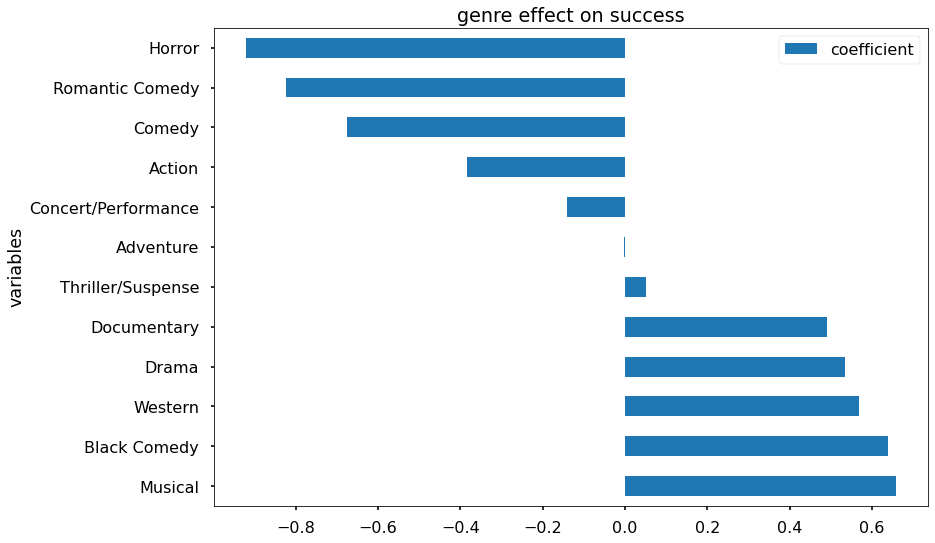

In [40]:
movie_co_genres = movie_co_genres.sort_values(by = 'coefficient', ascending = False)
movie_co_genres.plot.barh('variables','coefficient')
plt.title("genre effect on success")

**Since the top genres by count were dramas and comedies We predicted that these would have the most benefit to the success of movies compared to other genres.**
We see comedies harm the ratings of a show. We believe this may be the case because an individual's preference for humor varies and so satisfying these different perspectives are difficult and can lead to controversy and therefore low ratings. Horror tends to harm ratings as well, which we think could be contributed to the fact that many people don't find horror movies to be 'scary' enough. Although these genres have a negative effect on ratings, they make up a large proportion of the genres shown on streaming services and traditional theaters. This suggests services and theaters continue to release content that rates low possible because low ratings bring exposure and encourage people to talk about the movie. interestingly, black comedies have a positive effect on ratings, possibly because this genre is catering to a specific niche where it is easier to satisfy the humor preferences of the audience. <br>On the opposite extreme are dramas and thrillers. Dramas were the most prominent genre shown on streaming services and theaters, so this supports the fact that people e joy this content. Drama most likely encourages conversation similarly to comedies but in a more positive way.
**Takeaway: Dramas and comedies are the most prominent genres shown on streaming services and theaters and ironically fall on the opposite extremes. This suggests that streaming services and theaters tend to release content that promotes extreme/intense opinions whether that is positive or negative. This is most likely done for marketing and shareability purposes, which increases the longevity of the company. This suggests that company may not define the success of a movie based on ratings but more on its shareability and social impact**

Text(0.5, 1.0, 'age ratings effect on success')

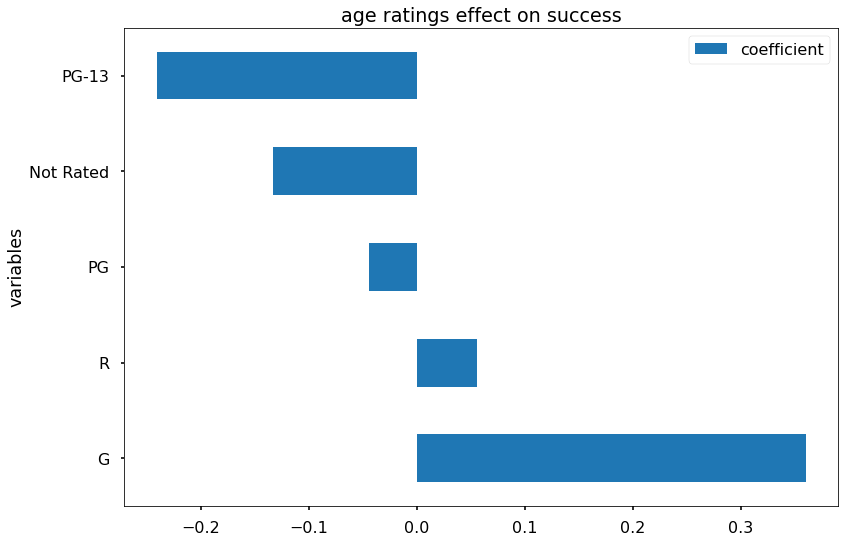

In [41]:
movie_co_age = movie_co_age.sort_values(by = 'coefficient', ascending = False)
movie_co_age.plot.barh('variables','coefficient')
plt.title("age ratings effect on success")



**The graph suggests that movies are better off being rated G than PG 13** This is possible because pg 13 is limiting the audience that the movie is catered to. This is perfectly valid for an adult to watch G-rated movies and parents tend to watch G-rated movies with their children; however PG 13 is mostly catered to teens and young adults, therefore people outside this age range may not enjoy these movies. 


Text(0.5, 1.0, 'Specfic Type effect on success')

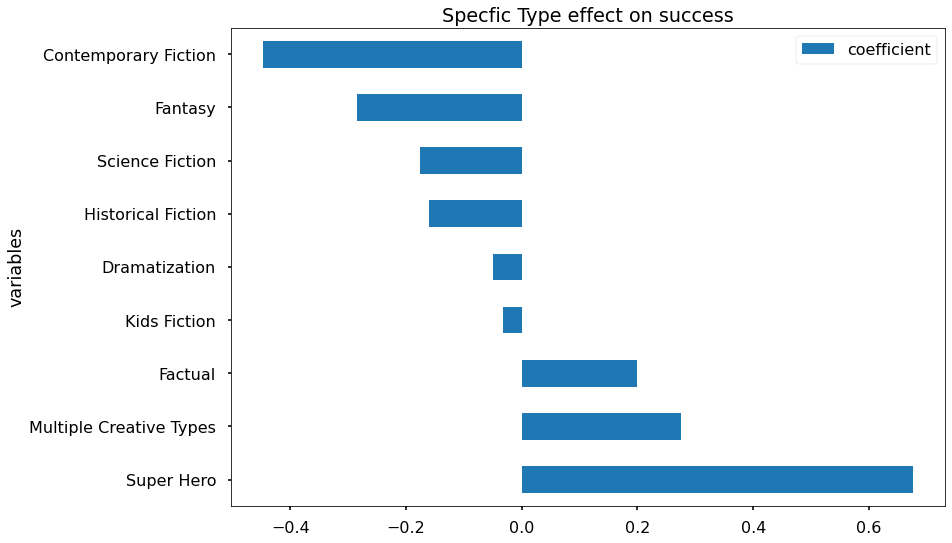

In [42]:
movie_co_type = movie_co_type.sort_values(by = 'coefficient', ascending = False)
movie_co_type.plot.barh('variables','coefficient')
plt.title("Specfic Type effect on success")

Text(0.5, 1.0, 'Source effect on success')

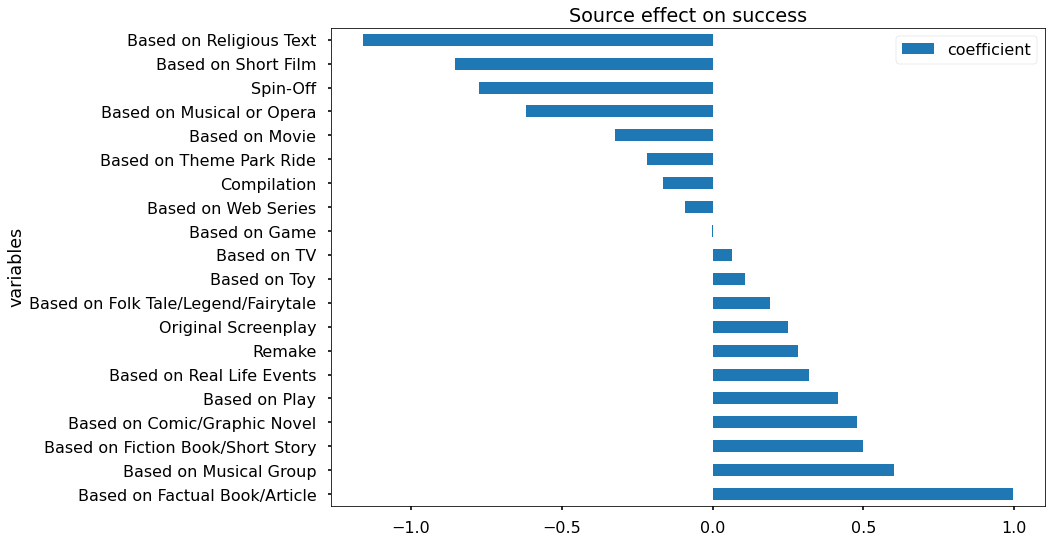

In [43]:
movie_co_source = movie_co_source.sort_values(by = 'coefficient', ascending = False)
movie_co_source.plot.barh('variables','coefficient')
plt.title("Source effect on success")


Text(0.5, 1.0, 'Most significant factors effecting on success')

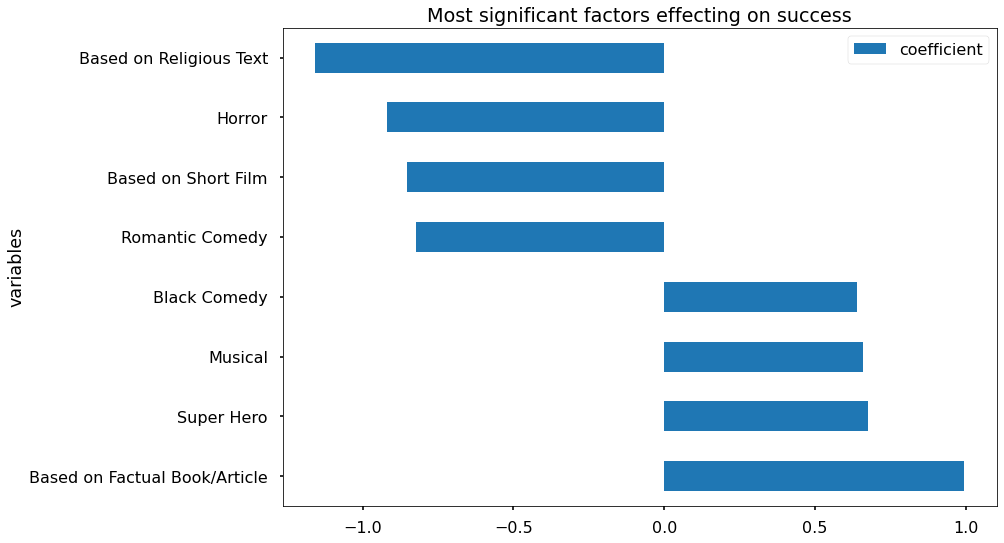

In [44]:
movie_co_top = movie_co.sort_values(by = 'coefficient', ascending = False)[:4]
movie_co_top = pd.concat([movie_co_top,movie_co.sort_values(by = 'coefficient', ascending = False)[-4:]],axis = 0)
movie_co_top.plot.barh('variables','coefficient')
plt.title("Most significant factors effecting on success")



### We  discuss other findings about these grpahs in the final takeaway###

## Question 2: What factors impact the success of a tv show?##
Our dataset for tv shows were more limited than our movie data set. We do not have access to the source or creative type and have a limited age description. We need to see if the variables we have are enough to predict the success of a tv show.<br>
**variables**
* genre
* isAdult: is the movie only meant for adults only? (binary)

**Setting up data for logistic regression model**
We will be creating a logistic regression model for the imdb data to predict if a show is successful. We will attempt to predict the success of the show based on it's genre and isAdult.

In [45]:
imdb = pd.read_csv("non_netflix_shows.csv")
imdb['successful'] = imdb['rating'] > 7

### Creating genre columns
This genre column was initally a string but we want to recongize each genre indiviually. So each genre was split into seperate columns

In [46]:
log_imdb = imdb.assign(genres=imdb.genre.str.split(","))
log_imdb = log_imdb.genres.swifter.apply(pd.Series).merge(log_imdb, right_index = True, left_index = True)


In [47]:
log_imdb=log_imdb[log_imdb['genre'] != '\\N']

In [48]:
df_genre = pd.get_dummies(log_imdb[0], prefix ="genre 1")
log_imdb = pd.concat([log_imdb,df_genre],axis = 1)

In [49]:
df_genre = pd.get_dummies(log_imdb[1],prefix ="genre 2" )
log_imdb = pd.concat([log_imdb,df_genre],axis = 1)

In [50]:
df_genre = pd.get_dummies(log_imdb[2],prefix ="genre 3" )
log_imdb = pd.concat([log_imdb,df_genre],axis = 1)

In [51]:
log_imdb = log_imdb.dropna(subset=[0,1,2])

In [52]:
variables = log_imdb.drop([0,1,2,'rating','startYear','numVotes','title','originalTitle','endYear','runtimeMinutes','genre','genres','successful'],axis = 1)



In [53]:
imdb_model = LogisticRegression().fit(variables, log_imdb['successful'])
scores = cross_val_score(imdb_model,variables,log_imdb['successful'], cv= 5)
print("mean cross validation score: {:.3f}".format(scores.mean()))
score = imdb_model.score(variables, log_imdb['successful'])
print('r^2 score: {:.3f}'.format(score))
c = imdb_model.coef_
v = variables.columns.tolist()
print('\n')
print('coefficients')
for i in range(0,len(v)):
    print('{}: {:.5f}'.format(v[i],imdb_model.coef_[0][i]))


mean cross validation score: 0.586
r^2 score: 0.594


coefficients
isAdult: -0.02657
genre 1_Action: -0.06897
genre 1_Adult: 0.24087
genre 1_Adventure: 0.33216
genre 1_Animation: -0.17691
genre 1_Biography: 0.24727
genre 1_Comedy: -0.02813
genre 1_Crime: 0.27852
genre 1_Documentary: 0.27503
genre 1_Drama: 0.02669
genre 1_Family: -0.22241
genre 1_Fantasy: 0.70992
genre 1_Game-Show: -1.25339
genre 1_History: -0.17572
genre 1_Horror: 0.04459
genre 1_Music: -0.23471
genre 1_Musical: -0.31849
genre 1_Mystery: 0.46708
genre 1_News: -0.66650
genre 1_Reality-TV: 0.02496
genre 1_Romance: 0.00000
genre 1_Sci-Fi: 0.52945
genre 1_Short: 0.00000
genre 1_Sport: 0.00000
genre 1_Talk-Show: 0.00000
genre 1_Thriller: 0.00000
genre 1_War: 0.00000
genre 1_Western: 0.00000
genre 2_Adult: -0.34058
genre 2_Adventure: -0.07386
genre 2_Animation: -0.82187
genre 2_Biography: 0.00657
genre 2_Comedy: -0.25710
genre 2_Crime: -0.14288
genre 2_Documentary: 0.37518
genre 2_Drama: -0.02052
genre 2_Family: -0.15294
gen

In [54]:
print('Baseline accuracy:', round(imdb.successful.sum()/len(imdb),3))

Baseline accuracy: 0.504


Since we did not have access to the same data information as what we had for the movies, we do not have context about the source, creative type, or age rating of the tv show. **It looks like the genre and isAdult variables are not enough to predict the success of a tv show. The regression model is not predicting the success of a show much higher than baseline.**

Even though our model may not be the best representation, lets still explore the significance of each factor

## Getting the average significance of each genre##
In this dataset, we have three genres to describe each show (assuming each genre are equally important), we will take the average each of the genres from these 3 columns

In [55]:
co = imdb_model.coef_[0][1:].tolist()
v = variables.drop(['isAdult'],axis = 1).columns.tolist()
imdb_co_genres = pd.DataFrame({'variables': v, 'coefficient': co})
imdb_co = pd.DataFrame({'variables': v, 'coefficient': co})


In [56]:
imdb_co_genres = imdb_co_genres.assign(genre=imdb_co_genres.variables.str.split("_"))
imdb_co_genres = imdb_co_genres.genre.swifter.apply(pd.Series).merge(imdb_co_genres, right_index = True, left_index = True)

In [57]:
genres = imdb_co_genres[1].unique()
mean_sig = genres.copy()
for i in range(0, len(genres)):
    coe =  imdb_co_genres[imdb_co_genres[1] == genres[i]]
    mean_sig[i] =(coe['coefficient'].mean())



Text(0.5, 1.0, 'genre ratings effect on success')

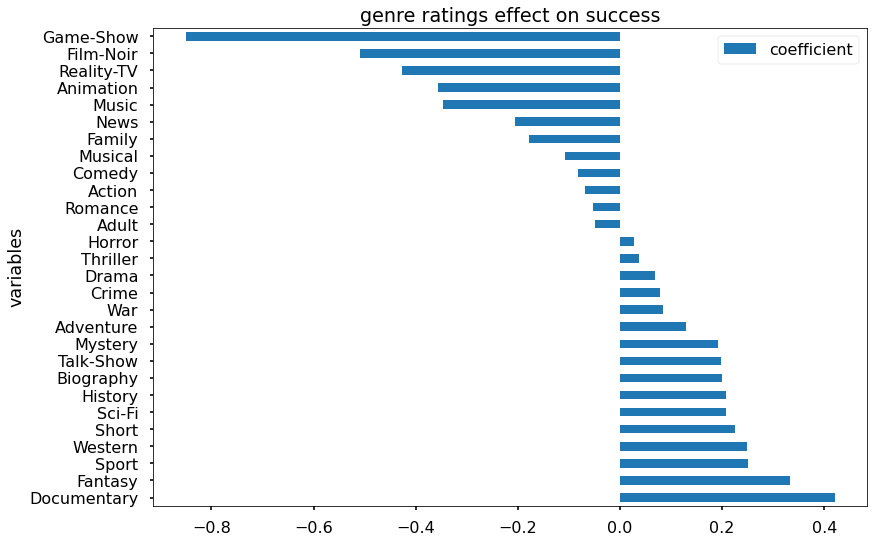

In [58]:
sigs = pd.DataFrame({'variables': genres, 'coefficient': mean_sig})
sigs = sigs.sort_values(by = 'coefficient', ascending = False)
sigs.plot.barh('variables','coefficient')
plt.title("genre ratings effect on success")

**analysis will be discussed at the end**

## Question 3: How does the model for determining the success of a TV show on traditional tv compared to the model for streaming services?##

## Shows on Neflix##

In [59]:
netflix_shows = pd.read_csv("onNetToo.csv")
netflix_shows['successful'] = netflix_shows['rating'] > 7
netflix_shows = netflix_shows[netflix_shows['genre'] != '\\N']

In [60]:
netflix_shows = netflix_shows.assign(genres=netflix_shows.genre.str.split(","))
netflix_shows = netflix_shows.genres.swifter.apply(pd.Series).merge(netflix_shows, right_index = True, left_index = True)


In [61]:
netflix_shows = netflix_shows.dropna(subset=[0,1,2])

In [62]:
df_genre = pd.get_dummies(netflix_shows[0], prefix ="genre 1")
netflix_shows = pd.concat([netflix_shows,df_genre],axis = 1)

In [63]:
df_genre = pd.get_dummies(netflix_shows[1], prefix ="genre 2")
netflix_shows = pd.concat([netflix_shows,df_genre],axis = 1)

In [64]:
df_genre = pd.get_dummies(netflix_shows[2], prefix ="genre 3")
netflix_shows = pd.concat([netflix_shows,df_genre],axis = 1)

In [65]:
df_ages = pd.get_dummies(netflix_shows['age'])
netflix_shows = pd.concat([netflix_shows,df_ages],axis = 1)

In [66]:
variables = netflix_shows.drop([0,1,2,'rating','isAdult','age','startYear_y','startYear','numVotes_x','numVotes_y','rating_y','title','originalTitle','endYear','runtimeMinutes','genre','genres','successful'],axis = 1)


In [67]:
netflix_model = LogisticRegression().fit(variables, netflix_shows['successful'])
scores = cross_val_score(netflix_model,variables,netflix_shows['successful'], cv= 5)
print("mean cross validation score: {:.3f}".format(scores.mean()))
score = netflix_model.score(variables, netflix_shows['successful'])
print('r^2 score: {:.3f}'.format(score))
c = netflix_model.coef_
v = variables.columns.tolist()
print('\n')
print('coefficients')
for i in range(0,len(v)):
    print('{}: {:.5f}'.format(v[i],netflix_model.coef_[0][i]))


mean cross validation score: 0.726
r^2 score: 0.865


coefficients
genre 1_Action: 0.23275
genre 1_Adventure: -0.71127
genre 1_Animation: 0.20279
genre 1_Biography: 0.12990
genre 1_Comedy: -1.17148
genre 1_Crime: 0.57546
genre 1_Drama: 0.40999
genre 1_Family: 0.33190
genre 2_Adventure: -1.13190
genre 2_Animation: -0.85824
genre 2_Comedy: 0.20279
genre 2_Crime: 1.43914
genre 2_Drama: -0.58700
genre 2_Family: -0.38536
genre 2_Fantasy: 0.07560
genre 2_Game-Show: 0.16437
genre 2_Horror: 0.38997
genre 2_Music: 0.14671
genre 2_Mystery: 0.24430
genre 2_Romance: 0.18737
genre 2_Sci-Fi: 0.11229
genre 3_Animation: 0.65941
genre 3_Comedy: 0.18460
genre 3_Crime: 0.37103
genre 3_Drama: 0.02531
genre 3_Family: -1.06294
genre 3_Fantasy: -0.08824
genre 3_History: 0.09917
genre 3_Horror: 0.19602
genre 3_Music: -1.12560
genre 3_Musical: 0.14671
genre 3_Mystery: -0.31084
genre 3_Reality-TV: 0.16437
genre 3_Romance: 0.06546
genre 3_Sci-Fi: 0.32739
genre 3_Sport: 0.12263
genre 3_Thriller: 0.16081
genre 3_W

In [68]:
print('Baseline accuracy:', round(netflix_shows.successful.sum()/len(netflix_shows),3))

Baseline accuracy: 0.77


## Analysis##
This model is also not doing well at predicting the success of Netflix shows since we only have access to the genre of the show. But let explore the results.

In [69]:
age_rating = netflix_shows['age'].unique()

In [70]:
co = netflix_model.coef_[0].tolist()
v = variables.columns.tolist()
netflix_co = pd.DataFrame({'variables': v, 'coefficient': co})
netflix_co_genres =  netflix_co[~netflix_co['variables'].isin(age_rating)]
netflix_co_age =  netflix_co[netflix_co['variables'].isin(age_rating)]

Text(0.5, 1.0, 'age ratings effect on success')

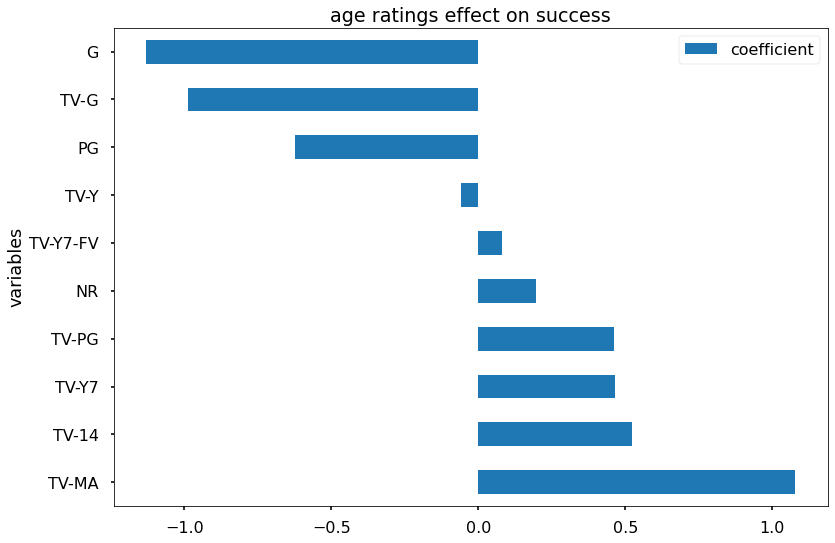

In [71]:
netflix_co_age = netflix_co_age.sort_values(by = 'coefficient', ascending = False)
netflix_co_age.plot.barh('variables','coefficient')
plt.title("age ratings effect on success")


In [72]:
netflix_co_genres
netflix_co_genres = netflix_co_genres.assign(genre=netflix_co_genres.variables.str.split("_"))
netflix_co_genres = netflix_co_genres.genre.swifter.apply(pd.Series).merge(netflix_co_genres, right_index = True, left_index = True)


In [73]:
genres = netflix_co_genres[1].unique()
mean_sig = genres.copy()
for i in range(0, len(genres)):
    coe =  netflix_co_genres[netflix_co_genres[1] == genres[i]]
    mean_sig[i] =(coe['coefficient'].mean())



Text(0.5, 1.0, 'genre ratings effect on success')

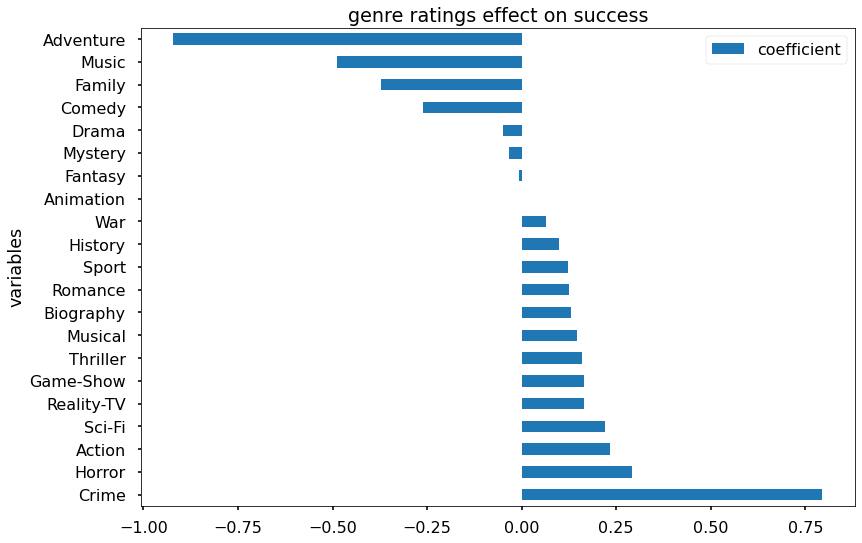

In [74]:
sigs = pd.DataFrame({'variables': genres, 'coefficient': mean_sig})
sigs = sigs.sort_values(by = 'coefficient', ascending = False)
sigs.plot.barh('variables','coefficient')
plt.title("genre ratings effect on success")

In [75]:
netflix_co_sigs = pd.concat([netflix_co_age,sigs], axis = 0)

Text(0.5, 1.0, 'Most significant factors effecting on success')

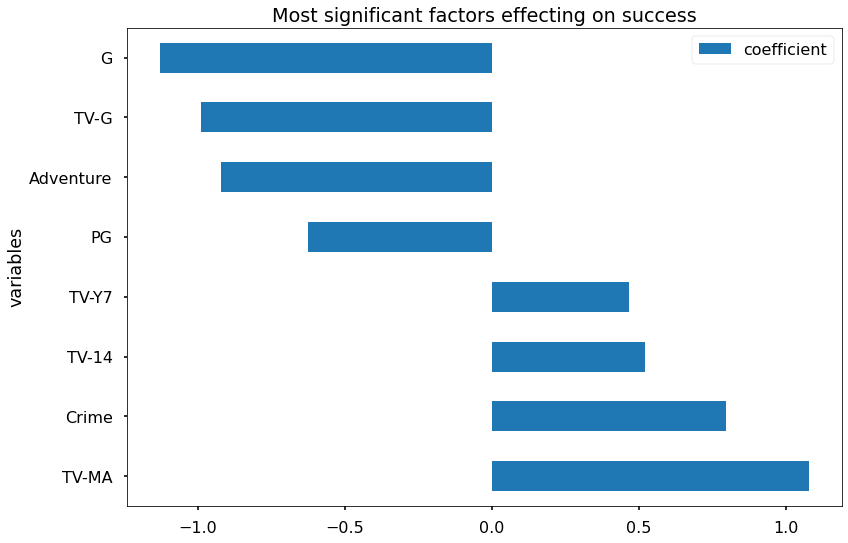

In [76]:
netflix_co_top = netflix_co_sigs.sort_values(by = 'coefficient', ascending = False)[:4]
netflix_co_top = pd.concat([netflix_co_top,netflix_co_sigs.sort_values(by = 'coefficient', ascending = False)[-4:]],axis = 0)
netflix_co_top.plot.barh('variables','coefficient')
plt.title("Most significant factors effecting on success")



## Shows on Amazon Prime Video##

In [77]:
prime_shows =pd.read_csv("primeCleaned.csv")
prime_shows['successful'] = prime_shows['rating'] > 7
prime_shows = prime_shows[prime_shows['genre'] != '\\N']

In [78]:
prime_shows = prime_shows.assign(genres=prime_shows.genre.str.split(","))
prime_shows = prime_shows.genres.swifter.apply(pd.Series).merge(prime_shows, right_index = True, left_index = True)


In [79]:
prime_shows = prime_shows.dropna(subset=[0,1])

In [80]:
df_genre = pd.get_dummies(prime_shows[0], prefix ="genre 1")
prime_shows = pd.concat([prime_shows,df_genre],axis = 1)

In [81]:
df_genre = pd.get_dummies(prime_shows[1], prefix ="genre 2")
prime_shows = pd.concat([prime_shows,df_genre],axis = 1)

In [82]:
df_ages = pd.get_dummies(prime_shows['age'])
prime_shows = pd.concat([prime_shows,df_ages],axis = 1)

In [83]:
variables = prime_shows.drop([0,1,2,3,4,'rating','No of seasons available','age','startYear','Language','title','genre','genres','successful','S.no.'],axis = 1)


In [84]:
prime_model = LogisticRegression().fit(variables, prime_shows['successful'])
scores = cross_val_score(prime_model,variables,prime_shows['successful'], cv= 5)
print("mean cross validation score: {:.3f}".format(scores.mean()))
score = prime_model.score(variables, prime_shows['successful'])
print('r^2 score: {:.3f}'.format(score))
c = prime_model.coef_
v = variables.columns.tolist()
print('\n')
print('coefficients')
for i in range(0,len(v)):
    print('{}: {:.5f}'.format(v[i],prime_model.coef_[0][i]))


mean cross validation score: 0.560
r^2 score: 0.740


coefficients
genre 1_Action: 0.28295
genre 1_Animation: 0.27233
genre 1_Arts: -0.43127
genre 1_Comedy: 0.01609
genre 1_Drama: -0.50036
genre 1_Fantasy: -0.42115
genre 1_Kids: 0.62119
genre 1_Sci-fi: 0.35789
genre 1_Sports: -0.19716
genre 2_ Action: 0.83088
genre 2_ Animation: 0.62119
genre 2_ Arts: -0.45343
genre 2_ Comeddy: -0.45904
genre 2_ Comedy: -0.14755
genre 2_ Documentary: -0.59999
genre 2_ Drama: 0.46041
genre 2_ Entertainment: -0.43127
genre 2_ Fantasy: 0.08327
genre 2_ Horror: 0.16216
genre 2_ LGBTQ: 0.34539
genre 2_ Romance: 0.12800
genre 2_ Sci-fi: -0.88802
genre 2_ Sports: -0.23506
genre 2_ Suspense: 0.58355
13+: -0.23946
16+: 0.19047
18+: 0.73512
7+: -0.18101
All: -0.50461


## Analysis##
This model is also not doing well at predicting the success of prime shows since we only have access to the genre of the show. But let explore the results.

In [85]:
print('Baseline accuracy:', round(prime_shows.successful.sum()/len(prime_shows),3))

Baseline accuracy: 0.5


In [86]:
age_rating = prime_shows['age'].unique()

In [87]:
co = prime_model.coef_[0].tolist()
v = variables.columns.tolist()
prime_co = pd.DataFrame({'variables': v, 'coefficient': co})
prime_co_genres =  prime_co[~prime_co['variables'].isin(age_rating)]
prime_co_age = prime_co[prime_co['variables'].isin(age_rating)]

Text(0.5, 1.0, 'age ratings effect on success')

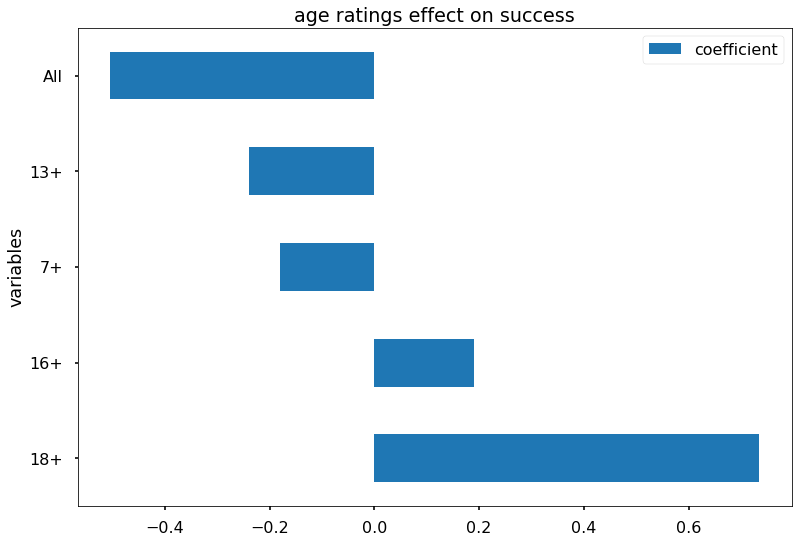

In [88]:
prime_co_age = prime_co_age.sort_values(by = 'coefficient', ascending = False)
prime_co_age.plot.barh('variables','coefficient')
plt.title("age ratings effect on success")


In [89]:
prime_co_genres = prime_co_genres.assign(genre=prime_co_genres.variables.str.split("_"))
prime_co_genres = prime_co_genres.genre.swifter.apply(pd.Series).merge(prime_co_genres, right_index = True, left_index = True)


In [90]:
genres = prime_co_genres[1].unique()
mean_sig = genres.copy()
for i in range(0, len(genres)):
    coe =  prime_co_genres[prime_co_genres[1] == genres[i]]
    mean_sig[i] =(coe['coefficient'].mean())



Text(0.5, 1.0, 'genre ratings effect on success')

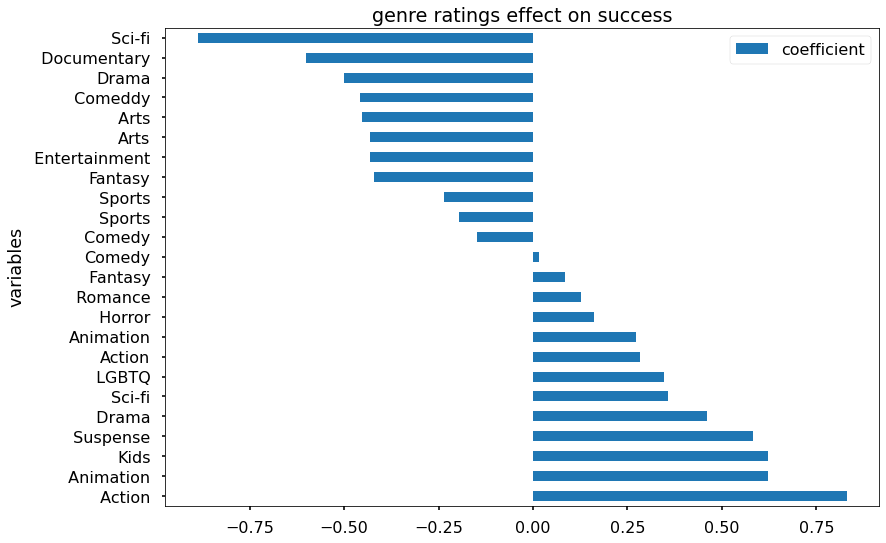

In [91]:
sigs = pd.DataFrame({'variables': genres, 'coefficient': mean_sig})
sigs = sigs.sort_values(by = 'coefficient', ascending = False)
sigs.plot.barh('variables','coefficient')
plt.title("genre ratings effect on success")

In [92]:
prime_co_sigs = pd.concat([prime_co_age,sigs], axis = 0)

Text(0.5, 1.0, 'Most significant factors effecting on success')

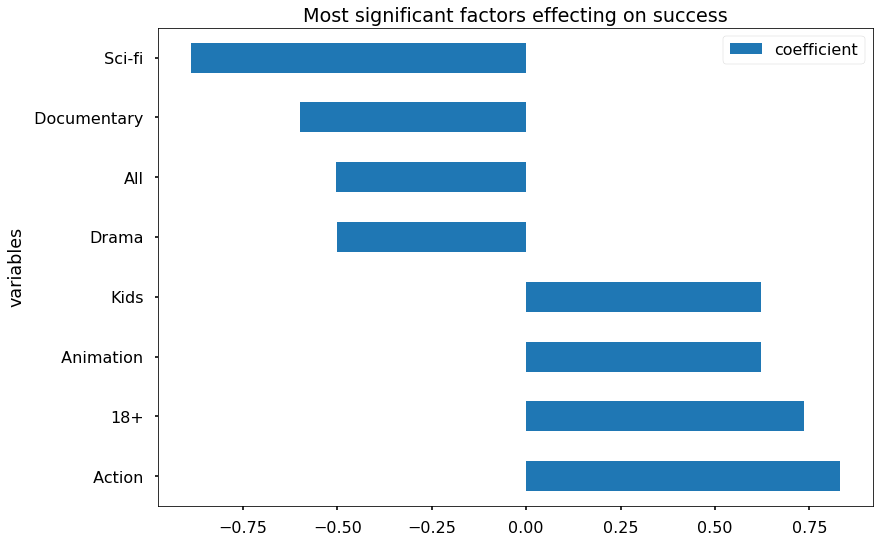

In [93]:
prime_co_top = prime_co_sigs.sort_values(by = 'coefficient', ascending = False)[:4]
prime_co_top = pd.concat([prime_co_top,prime_co_sigs.sort_values(by = 'coefficient', ascending = False)[-4:]],axis = 0)
prime_co_top.plot.barh('variables','coefficient')
plt.title("Most significant factors effecting on success")



## Key Takeways##
### Movies and tv shows tend to fair well both on traditional tv and through streaming services.### 
We weren't able to find significant evidence supporting that adding a show to a streaming service help with their success as opposed to solely being on traditional tv platforms, but this could be due to the lack of data available about the shows on streaming services  <br>
### Each platform have distinct genres and age groups that do well on their platform.###
**Traditional movies (in theaters/on tv channels)**
* The coefficients for our model suggest that movies based on books and superhero movies fair the best on traditional platforms (theaters and tv). This is supported by outside context because we know marvel movies and book series (harry potter, hunger games) have had the best success over the last decade. On the other side, horror movies and comedies harm the success of a movie. As we stated before,  this could be due to the wide range in preferences for humor and gore so it is hard to cater to all audiences. Age ratings did not show up as a signifcant factor to teh success of a movie (compared to the other factors) which makes sense as movie in theaters cater to all age ranges.<br>

**Traditional tv shows(on tv channels)**<br>
* The coefficients for our model suggest traditional TV has the most success in sports, documentaries, and fantasy. From a social standpoint, TV remains the top platform for watching sporting events, so this makes sense. As for the documentary category, we predict this may include popular crime documentaries or education television (animal planet, history channel) which primarily restrict their content to traditional tv channels (for most of these shows, you can only watch on tv and not streaming services) which explains its top rank. Game shows, film noir, and reality tv are harming the success of the show. Although game shows are often seen as bad/cringe but ultimately a part of the culture of tv, we did not predict film noir and reality tv to be at this placement. Reality tv, in particular, is very popular and many film noir shows are critically acclaimed. This is evidence that we may need to alter our definition of success for tv shows.
 
**Netflix** <br>
* The coefficients for our model suggest that mature crime tv shows/movies do better on Netflix than any other genre or age group. G-rated adventure content does the worst. This could be because Netflix started out having very mature content and marketing itself initially as a more freeing/expressive platform compared to traditional tv. Their very first original series orange is the new black, house of cards, and their more recent popular series money heist, and narcos support the fact that Netflix has a representation for mature content. You can even see that they are putting in the effort to switch this representation by creating a kid account feature so the younger audience can use the streaming service under restrictions. They also have been coming out with more G-rated cartoons such as cocomelon. These efforts may make Netflix more well-rounded in the success of its content in the future.

**Amazon Prime Video**
* The coefficients for our model suggest that mature action shows/movies do better on Amazon Prime than any other genre or age group. Similar to Netflix, prime and other streaming services are mostly used by adults, so mature content will be favored. As for action, amazon prime has access to more shows that were originally in the theater. Netflix also has action movies but a lot of movies are available temporarily due to subscription partnerships expiring. Amazon often maintains these partnerships for a longer time, so users are most likely using amazon prime to watch shows that are not available on Netflix (many action movies). As for sci-fi and documentaries, which are harming the success of shows/movies we are not exactly sure of the cause of this. It could be the fact that the user niche that uses amazon prime is younger and therefore does not tend to watch this content, but since we don't have details on the age_ratings for this dataset, more evidence is needed.


### We need more than age_rating and genre to determine the success of a show/movie### 
Our model only did slightly better than baseline when we only had access to genre and age_rating. Knowing the origins of a show/movie may significantly improve our model as we saw it help with the movie_prediction model.
### There is evidence that platforms (streaming and traditional) are not prioritizing adding content that our model deemed successful### 
* While our model showed that comedies do not do well rating-wise, this genre is one of the highest in the percentage of content on these platforms. As discussed earlier this could be due to the fact that negative opinions promote shareability which benefits the platform, therefore we may need to add other factors in what makes a show successful. Shareability may be a key factor in determining the success of a show and so in the future this should be explored, possibly looking into how shows/movies do on social media (whether they 'trend' or are talking a lot about)


# Part 2 #
### Is there a correlation between how long a TV show goes on for (number of seasons) and its genre, rating and age range (age rating)? ###

We can explore our amazon prime dataset to determine this. Unfortunately, the other datasets do not have season information

In [94]:
prime_shows =pd.read_csv("primeCleaned.csv")
prime_shows.head()

,S.no.,title,startYear,No of seasons available,Language,genre,rating,age
0,1,Pataal Lok,2020.0,1.0,Hindi,Drama,7.5,18+
1,2,Upload,2020.0,1.0,English,Sci-fi comedy,8.1,16+
2,3,The Marvelous Mrs. Maisel,2017.0,3.0,English,"Drama, Comedy",8.7,16+
3,4,Four More Shots Please,2019.0,2.0,Hindi,"Drama, Comedy",5.3,18+
4,5,Fleabag,2016.0,2.0,English,Comedy,8.7,18+


In [95]:
prime_shows.head()

,S.no.,title,startYear,No of seasons available,Language,genre,rating,age
0,1,Pataal Lok,2020.0,1.0,Hindi,Drama,7.5,18+
1,2,Upload,2020.0,1.0,English,Sci-fi comedy,8.1,16+
2,3,The Marvelous Mrs. Maisel,2017.0,3.0,English,"Drama, Comedy",8.7,16+
3,4,Four More Shots Please,2019.0,2.0,Hindi,"Drama, Comedy",5.3,18+
4,5,Fleabag,2016.0,2.0,English,Comedy,8.7,18+


In [96]:
prime_shows = prime_shows.assign(genre=prime_shows.genre.str.split(","))
prime_shows = prime_shows.genre.swifter.apply(pd.Series).merge(prime_shows, right_index = True, left_index = True)


In [97]:
prime_shows['genre_code'] = prime_shows[0].astype('category').cat.codes
prime_shows['age_code'] = prime_shows['age'].astype('category').cat.codes


Text(0.5, 1.0, 'number of seasons vs genre(in numeric code)')

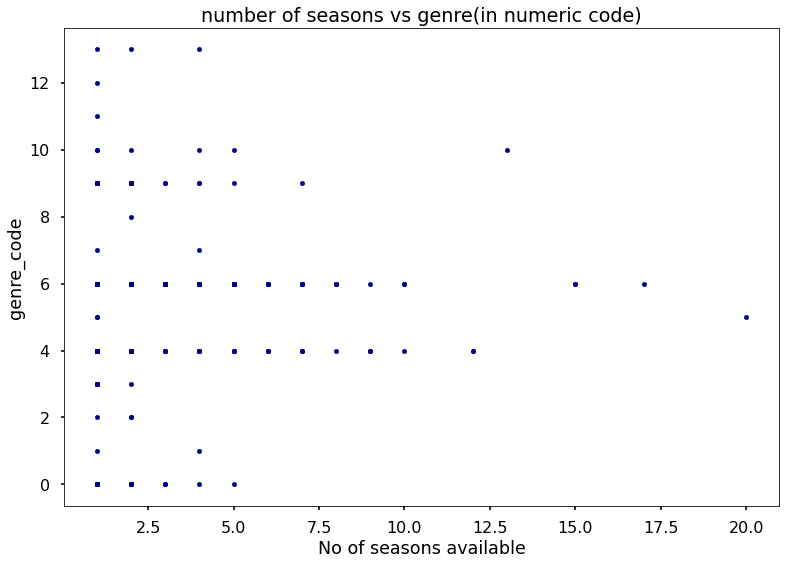

In [98]:
prime_shows.plot.scatter(x='No of seasons available', y='genre_code', c='DarkBlue')
plt.title("number of seasons vs genre(in numeric code)")

In [99]:
g = prime_shows.sort_values(by ='genre_code')[0].unique().tolist()[1:]

In [100]:
for i in range(0,len(g)):
    print("code {}: {}".format(i, g[i]))

code 0: Action
code 1: Adventure
code 2: Animation
code 3: Arts
code 4: Comedy
code 5: Documentary
code 6: Drama
code 7: Fantasy
code 8: Horror
code 9: Kids
code 10: Sci-fi
code 11: Sci-fi 
code 12: Sci-fi comedy
code 13: Sports


## observation##
Looking at the genres associated with the codes, we can see that comedies, dramas, and sci fi are likely to last the longest out of all other genres. This is makes sense is the longest running shows (family guy, simpsons) fit into these catergories. adventure, animations and art, however, do not last very long.

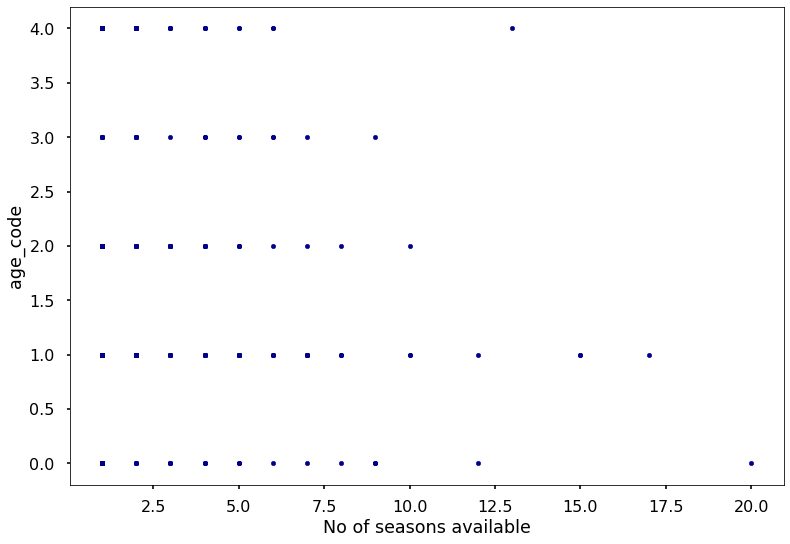

In [101]:
prime_shows.plot.scatter(x='No of seasons available', y='age_code', c='DarkBlue')

## observation##
Looking at the age_ratings associated with the codes there is little to no correlation between the age rating of the show and the number of seasons. Shows meant for all ages can last for any length.

In [102]:
a = prime_shows.sort_values(by ='age_code')['age'].unique().tolist()[1:]
for i in range(0,len(a)):
    print("code {}: {}".format(i, a[i]))

code 0: 13+
code 1: 16+
code 2: 18+
code 3: 7+
code 4: All


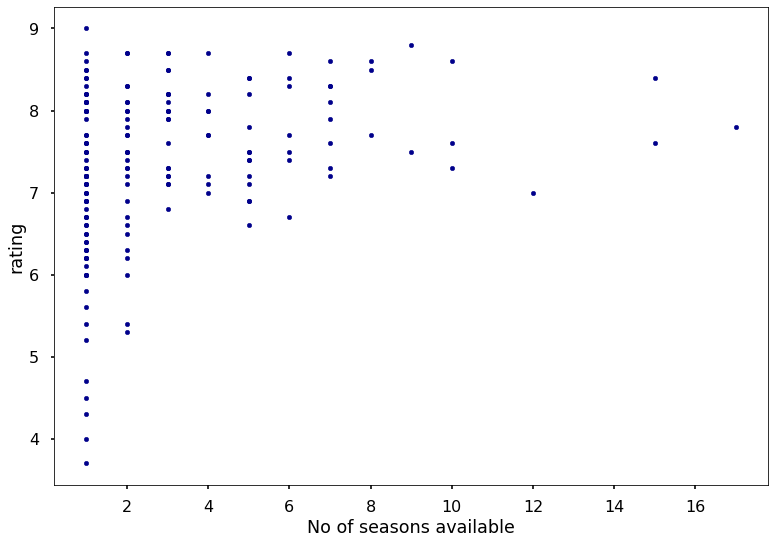

In [103]:
prime_shows.plot.scatter(x='No of seasons available', y='rating', c='DarkBlue')

## observation##
Looking at the ratings associated with the codes, we see a positive correlation between ratings and the number of seasons. Shows with a good rating ( 7.0 and up which is what we used to define a successful show) are more likely to last for a longer time. This makes logical sense.